In [4]:
import pandas as pd
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)
import os
import sys
import utils
key = 'SK_ID_CURR'
target = 'TARGET'
app = utils.read_df_pkl('../input/clean_cpy_app*').reset_index()

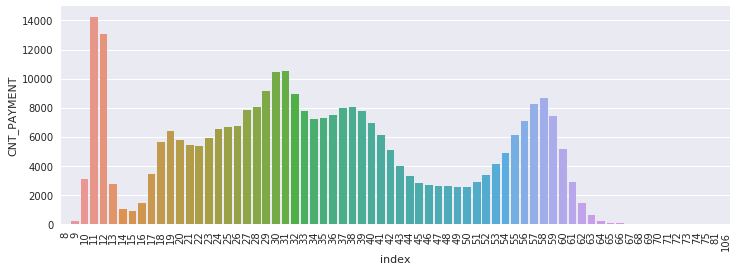

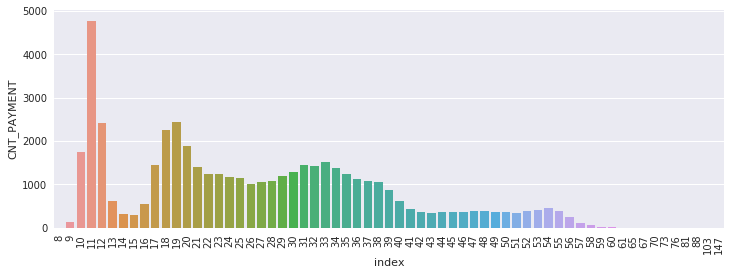

SystemExit: 

In [47]:
train = app[~app[target].isnull()]
test = app[app[target].isnull()]
train_cnt = train['CNT_PAYMENT'].value_counts().reset_index().sort_values(by='index')
test_cnt = test['CNT_PAYMENT'].value_counts().reset_index().sort_values(by='index')
plt.figure(figsize=(12, 4))
bar_train = sns.barplot(data=train_cnt, x='index', y='CNT_PAYMENT', )
bar_train.set_xticklabels(rotation=90, labels=train_cnt['index'])
plt.show()
plt.figure(figsize=(12, 4))
bar_test = sns.barplot(data=test_cnt, x='index', y='CNT_PAYMENT')
bar_test.set_xticklabels(rotation=90, labels=test_cnt['index'])
plt.show()

In [7]:
bur = utils.read_df_pkl('../input/clean_bur*')
print(bur_t.head())
sys.exit()

plt.figure(figsize=(10,10))
# sns.lmplot(x='SK_ID_BUREAU',y=feat1,data=bur, fit_reg=False, size=8, scatter_kws={'s':10}, hue=target)
key_b = 'SK_ID_BUREAU'
bur_train = bur_t[bur_t[target]>=0]
bur_test = bur_t[bur_t[target]<0]
bur_train[key_b].plot(kind='kde')
bur_test[key_b].plot(kind='kde')

   SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN         

SystemExit: 

<Figure size 720x720 with 0 Axes>

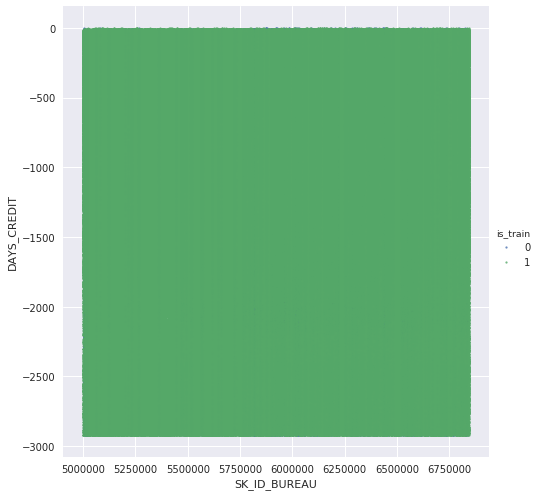

In [3]:
# bureauのDAYS_CREDITはIDの大きさと関連がないか？→なさげ
plt.figure(figsize=(10,10))
df = bur_t.copy()
df_train = df[df[target]>=0]
df_test = df[df[target]<0]
dc = 'SK_ID_BUREAU'
# dc = 'SK_ID_PREV'
df_train = df_train.groupby(dc)['DAYS_CREDIT'].mean().reset_index()
df_test = df_test.groupby(dc)['DAYS_CREDIT'].mean().reset_index()
df_train['is_train'] = 1
df_test['is_train'] = 0
df = pd.concat([df_train, df_test], axis=0)
sns.lmplot(x=dc,y='DAYS_CREDIT',data=df, fit_reg=False, size=7, scatter_kws={'s':5}, hue='is_train')